In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("RETAIL.csv")

In [4]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [6]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [7]:
cat_sales = df.groupby('Product Category')['Total Amount'].sum().reset_index()
print(cat_sales)

  Product Category  Total Amount
0           Beauty        143515
1         Clothing        155580
2      Electronics        156905


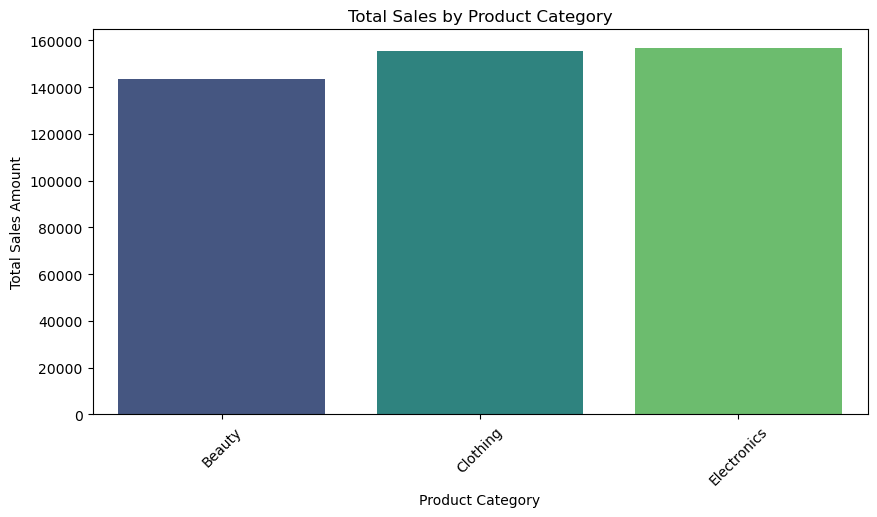

In [8]:
plt.figure(figsize=(10, 5))
sns.barplot(data=cat_sales, x='Product Category', y='Total Amount', palette="viridis")
plt.title("Total Sales by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Total Sales Amount")
plt.xticks(rotation=45)
plt.show()

In [9]:
top_categories = cat_sales.sort_values(by='Total Amount', ascending=False)
print(top_categories)

  Product Category  Total Amount
2      Electronics        156905
1         Clothing        155580
0           Beauty        143515


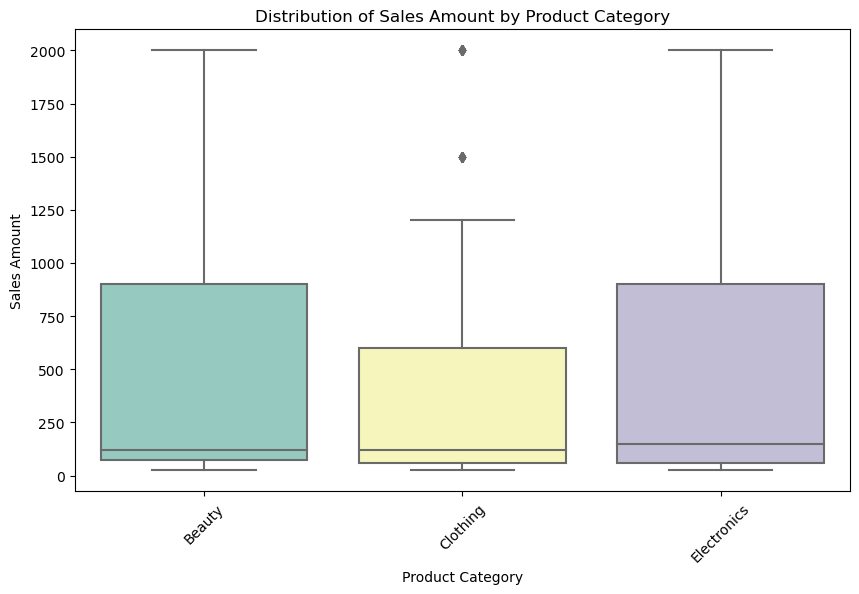

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Product Category', y='Total Amount', palette="Set3")
plt.title("Distribution of Sales Amount by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Sales Amount")
plt.xticks(rotation=45)
plt.show()

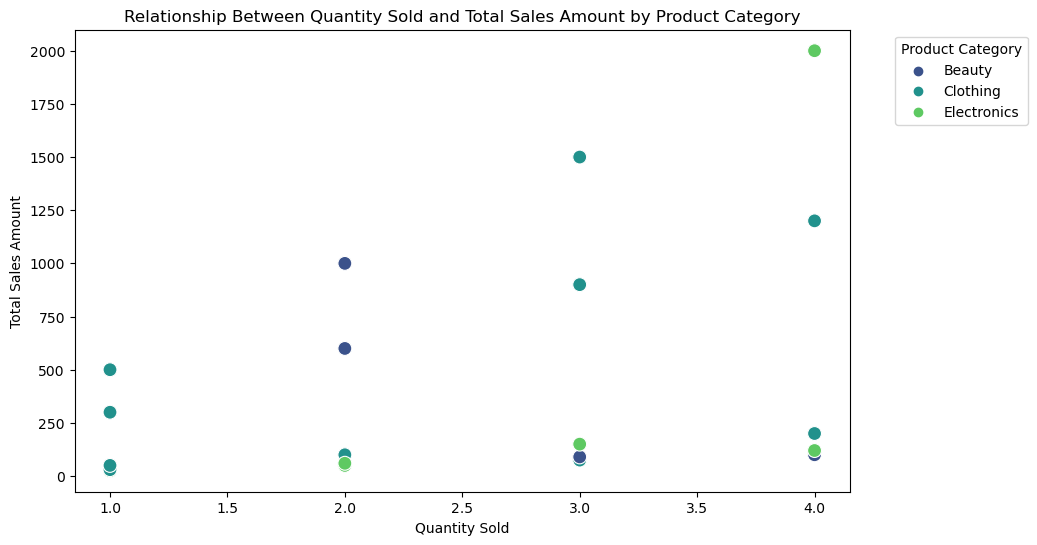

In [11]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Quantity', y='Total Amount', hue='Product Category', palette="viridis", s=100)
plt.title("Relationship Between Quantity Sold and Total Sales Amount by Product Category")
plt.xlabel("Quantity Sold")
plt.ylabel("Total Sales Amount")
plt.legend(title="Product Category", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# OR

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("shoping.csv")

In [16]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB
None


In [17]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [18]:
mall_sales = df.groupby('shopping_mall')['price'].sum().reset_index()

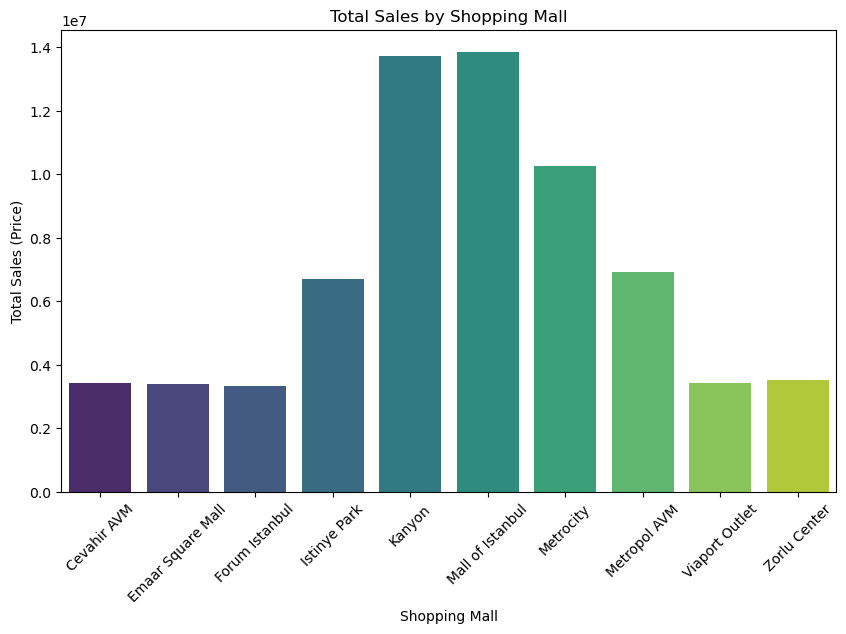

In [19]:
plt.figure(figsize=(10, 6))
sns.barplot(data=mall_sales, x='shopping_mall', y='price', palette='viridis')
plt.title("Total Sales by Shopping Mall")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales (Price)")
plt.xticks(rotation=45)
plt.show()

In [20]:
top_malls = mall_sales.sort_values(by='price', ascending=False).head()
print("Top-performing malls based on total sales:\n", top_malls)

Top-performing malls based on total sales:
       shopping_mall        price
5  Mall of Istanbul  13851737.62
4            Kanyon  13710755.24
6         Metrocity  10249980.07
7      Metropol AVM   6937992.99
3      Istinye Park   6717077.54


In [21]:
mall_category_sales = df.groupby(['shopping_mall', 'category'])['price'].sum().unstack().fillna(0)


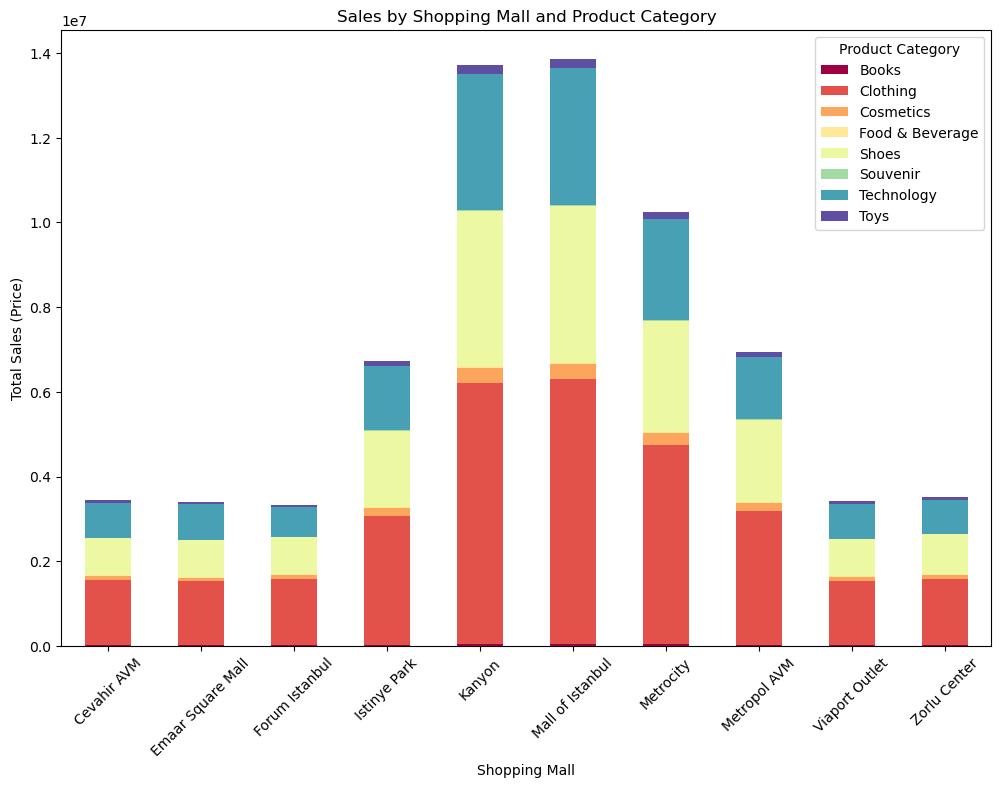

In [22]:
mall_category_sales.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.title("Sales by Shopping Mall and Product Category")
plt.xlabel("Shopping Mall")
plt.ylabel("Total Sales (Price)")
plt.xticks(rotation=45)
plt.legend(title="Product Category")
plt.show()


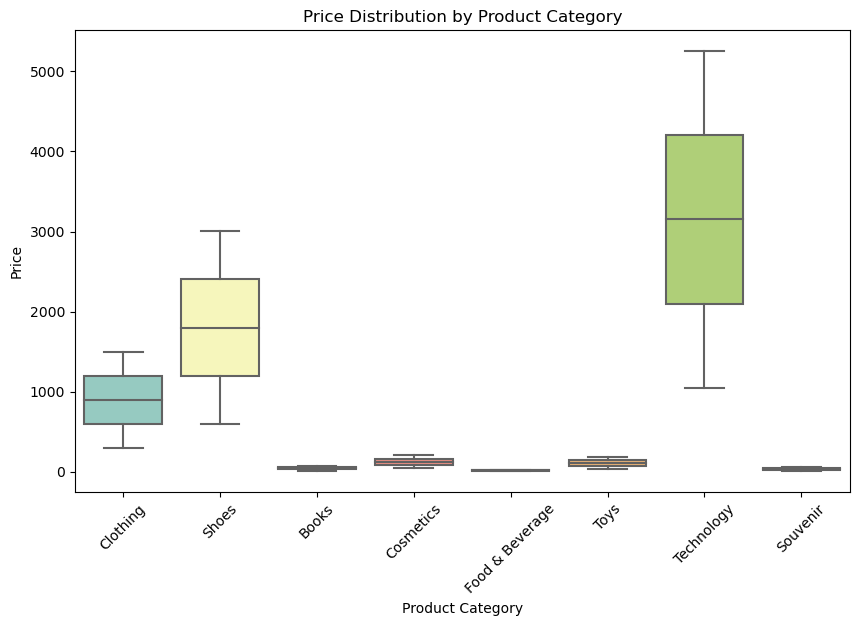

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='category', y='price', palette="Set3")
plt.title("Price Distribution by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()


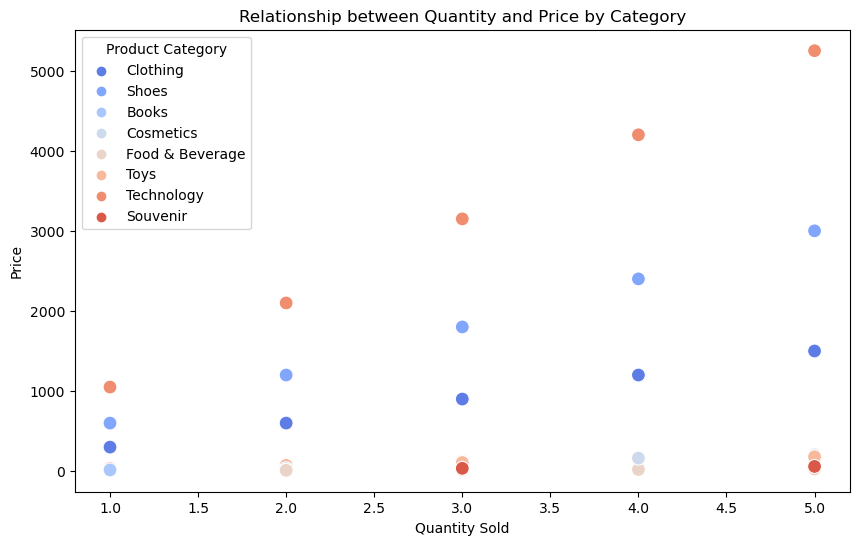

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='quantity', y='price', hue='category', palette="coolwarm", s=100)
plt.title("Relationship between Quantity and Price by Category")
plt.xlabel("Quantity Sold")
plt.ylabel("Price")
plt.legend(title="Product Category")
plt.show()